In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download venkatakanumuru/kddcup99csv

  0% 0.00/2.20M [00:00<?, ?B/s]
100% 2.20M/2.20M [00:00<00:00, 116MB/s]


In [ ]:
!unzip kddcup99csv.zip

Archive:  kddcup99csv.zip
  inflating: kddcup99.csv            


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/kddcup99.csv")

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
fin = []

for i in range(1,4):
    v = set(df.iloc[:,i].values)
    fin += v

In [ ]:
d = dict(enumerate(fin, start=1))
mymap = dict((v,k) for k,v in d.items())

In [ ]:
dataset = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [ ]:
#selecting the columns excluding lables
X = dataset.iloc[:, :-1].values

#selecting the lables column
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

#elavuating the results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  423     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     7     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     2     0     0     0     0     2     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   232     0     0     0     0     3     4     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     1
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     1
      0     0     0     0     0     0     0     0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       425
buffer_overflow       0.67      0.50      0.57         4
   guess_passwd       1.00      0.88      0.93         8
           imap       1.00      0.40      0.57         5
        ipsweep       0.97      0.97      0.97       239
           land       1.00      1.00      1.00         6
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         3
        neptune       1.00      1.00      1.00     21148
           nmap       0.87      0.95      0.91        43
         normal       1.00      1.00      1.00     19536
           perl       0.00      0.00      0.00         0
            pod       1.00      1.00      1.00        47
      portsweep       0.99      0.99      0.99       228
        rootkit       0.00      0.00      0.00         1
          satan       0.99      0.99      0.99       328
          smurf       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(5, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

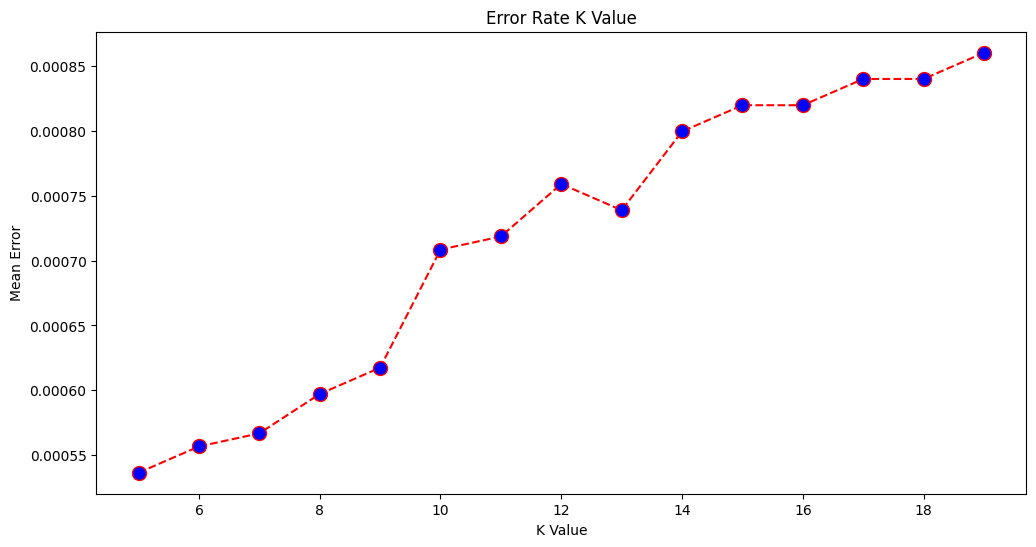

In [ ]:

#ploting
plt.figure(figsize=(12, 6))
plt.plot(range(5, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')